In [317]:
# import library, pandas to read the dataset, matplotlib to visualize data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Build a model
from sklearn.linear_model import LogisticRegression
# Split data to train and test
from sklearn.model_selection import train_test_split

In [318]:
# read data stored in path 'root/Data/' using pd.read_csv, then store the data in df dataframe
df = pd.read_csv('satisfaction.csv')

In [319]:
#show first five dataframe content 
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Exploring the data type

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [321]:
# check number of rows, number of columns 
df.shape

(129880, 24)

# Cleaning the data

In [322]:
# check null values 
df.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [323]:
# drop null rows since the dataset has enourmous number of rows
df1=df.dropna()
df1.isnull().sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [324]:
# make a copy of df1 stored in df2 and start exploring df2
df2=df1.copy()
df2.shape

(129487, 24)

In [325]:
df2.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Data exploration and visualization

In [326]:
df2.groupby(df2['satisfaction_v2']).mean()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction_v2,,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,64402.630595,37.468373,2025.202833,2.467315,3.016517,2.660609,3.008003,2.919922,2.609044,2.959833,2.851873,2.972818,3.052555,3.364269,2.971845,3.377203,2.869653,17.728777,18.504599
satisfied,65417.789848,41.049604,1944.469640,3.145552,2.968582,3.010285,2.975805,3.521374,4.024266,3.983085,3.985031,3.872196,3.844587,3.969287,3.645721,3.977639,3.751799,12.092393,12.268883


In [327]:
satisfied = df2[df2.satisfaction_v2=="satisfied"]
satisfied.shape

(70882, 24)

In [328]:
n_satisfied = df2[df2.satisfaction_v2=="neutral or dissatisfied"]
n_satisfied.shape

(58605, 24)

[Text(0.5, 0, 'satisfaction')]

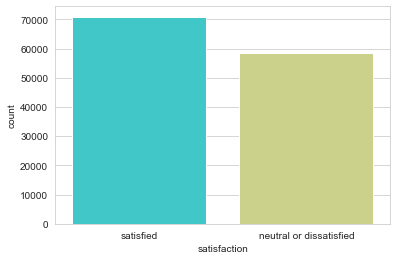

In [329]:
# visualization count of satisfied and non-satisfied
sns.set_style('whitegrid')
ax=sns.countplot(x=df2.satisfaction_v2 , data=df2, palette='rainbow' )
ax.set(xlabel="satisfaction")

**Noted that:
Count of satisfied people are more than dissatisfied with a very low difference

[Text(0.5, 0, 'satisfaction')]

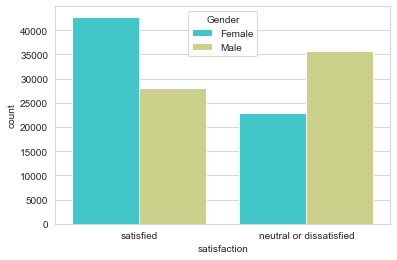

In [330]:
# visualization count of  satisfied and non-satisfied based on gender
sns.set_style('whitegrid')
ax=sns.countplot(x=df2.satisfaction_v2 , hue='Gender', data=df2 , palette='rainbow')
ax.set(xlabel="satisfaction")

**Noted that:
In satisfied: Female are satisfied more than Male
In dissatisfied: Male are dissatisfied more than Female

[Text(0.5, 0, 'satisfaction')]

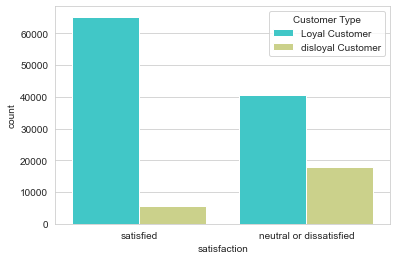

In [331]:
# visualization count of satisfied and non-satisfied based on loyality
sns.set_style('whitegrid')
ax=sns.countplot(x=df2.satisfaction_v2 , hue='Customer Type', data=df2 , palette='rainbow')
ax.set(xlabel="satisfaction")


**Noted that: People who were loyal are more satisfied than who were disloyal

[Text(0.5, 0, 'satisfaction')]

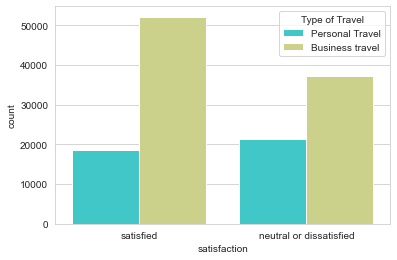

In [332]:
# visualization count of satisfied and non-satisfied based on Type of travel
sns.set_style('whitegrid')
ax=sns.countplot(x=df2.satisfaction_v2 , hue='Type of Travel', data=df2 , palette='rainbow')
ax.set(xlabel="satisfaction")


**Noted that:
People who were going on Business travel are more satisfied than who were on Personal travel

[Text(0.5, 0, 'satisfaction')]

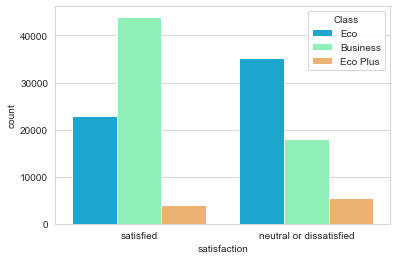

In [333]:
# visualization count of satisfied and non-satisfied based on  Class type 
sns.set_style('whitegrid')
ax=sns.countplot(x=df2.satisfaction_v2 , hue='Class', data=df2, palette='rainbow')
ax.set(xlabel="satisfaction")


**Noted that:
People who were on Business class are more satisfied than others on other classes

[Text(0.5, 0, 'satisfaction')]

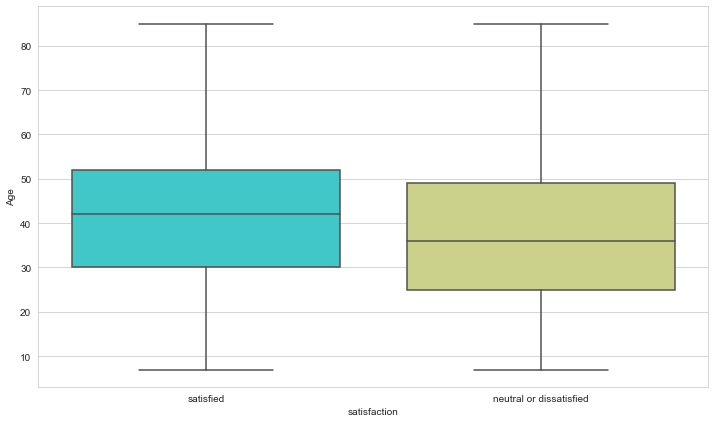

In [335]:
# visualization count of satisfied and non-satisfied based on Age
plt.figure(figsize=(12,7))
ax=sns.boxplot(x=df2.satisfaction_v2, y='Age', data=df2 , palette='rainbow')
ax.set(xlabel="satisfaction")

**Noted that:
People who were in the average age of 40 are satisfied. On the other hand, people who are in the average of 35 are dissatisfied

In [336]:
# drop unnessary columns

df2.drop(columns={'id'}, inplace=True)

In [337]:
df2.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [338]:
# Create dummy values for objects with string values
class_dummies = pd.get_dummies(df2['Class'], drop_first=True)

In [339]:
type_of_travel = pd.get_dummies(df2['Type of Travel'],drop_first=True)

In [340]:
customer_type = pd.get_dummies(df2['Customer Type'],drop_first=True)

In [341]:
gender = pd.get_dummies(df2['Gender'],drop_first=True)

In [342]:
satisfaction = pd.get_dummies(df2['satisfaction_v2'],drop_first=True)

In [343]:
#concat dummies with the dataframe used
df_dummies=pd.concat([df2,satisfaction,gender,customer_type,type_of_travel,class_dummies], axis='columns')

In [344]:
df_dummies.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfied,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,2,0,0.0,1,0,0,1,1,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,3,2,310,305.0,1,1,0,1,0,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,4,2,0,0.0,1,0,0,1,1,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,3,0,0.0,1,0,0,1,1,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,5,0,0.0,1,0,0,1,1,0


In [345]:
#drop columns that we already created dummy values instead of.
df_dummies.drop(['satisfaction_v2','Gender','Customer Type','Type of Travel' , 'Class'], axis=1,inplace=True)

In [346]:
df_dummies.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfied,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,2,0,0.0,1,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,3,2,310,305.0,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,2,0,0.0,1,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,3,0,0.0,1,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,5,0,0.0,1,0,0,1,1,0


In [347]:
df_dummies.rename(columns={'satisfied': 'Satisfaction', 'Male': 'Gender', 'disloyal Customer': 'Customer Type', 'Personal Travel': 'Type of Travel'}, inplace=True)

In [348]:
df_dummies.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Gender,Customer Type,Type of Travel,Eco,Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,2,0,0.0,1,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,3,2,310,305.0,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,2,0,0.0,1,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,3,0,0.0,1,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,5,0,0.0,1,0,0,1,1,0


In [349]:
X=df_dummies[['Age', 'Flight Distance','Gender','Customer Type','Type of Travel','Eco','Eco Plus', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                  'Inflight wifi service',  'Inflight entertainment','Online support', 'Ease of Online booking',
                  'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service','Cleanliness',
               'Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']]

In [350]:
y=df_dummies['Satisfaction']

In [351]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [352]:
# Build a model
model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [353]:
# Fitting the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [354]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [355]:
# Calculate the score
model.score(X_test,y_test)

0.8367827631477334

In [356]:
y_pred = model.predict(X_test)

In [357]:
from sklearn.metrics import confusion_matrix

In [358]:
confusion_matrix(y_test, y_pred)

array([[ 9643,  2124],
       [ 2103, 12028]], dtype=int64)